In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv("C:/Users/prksh/Downloads/RegressionModels/logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [92]:
df.shape

(396030, 27)

In [93]:
# Observation of datatype and null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [94]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [95]:
# Extraction of year from the 'Earliest Credit Line' column
df['ecl_year'] = df['earliest_cr_line'].str.split('-').str[-1]

# Conversion of datatype from 'String' to 'Integer' for the 'Earliest Credit Line Year' column
df['ecl_year'] = pd.to_numeric(df['ecl_year'])

In [96]:
# Extraction of pincode from the 'Address' column
df['pin_code'] = df['address'].str.split(' ').str[-1]
df['pin_code'] = df['pin_code'].astype('str')

In [97]:
# Extraction of pincode from the 'Address' column
df['issue_d_y'] = df['issue_d'].str.split('-').str[-1]

# Conversion of datatype from 'String' to 'Integer' for the 'Issue Date Year' column
df['issue_d_y'] = pd.to_numeric(df['issue_d_y'])

In [98]:
# Dropping the columns from which the requried data is extracted above
columns_to_drop = ['earliest_cr_line', 'address', 'issue_d']
df = df.drop(columns=columns_to_drop)

In [99]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type,pin_code
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,394275,396030,396030,396030
unique,2,7,35,173105,11,6,3,2,14,48817,2,3,10
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Fully Paid,debt_consolidation,Debt consolidation,f,INDIVIDUAL,70466
freq,302005,116018,26655,4389,126041,198348,139563,318357,234507,152472,238066,395319,56985


In [100]:
numerical_columns = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
    'mort_acc', 'pub_rec_bankruptcies'
]

categorical_columns = [
    'term', 'grade', 'sub_grade', 
    'home_ownership', 'verification_status', 'loan_status', 'initial_list_status', 
    'application_type', 'pin_code'
]


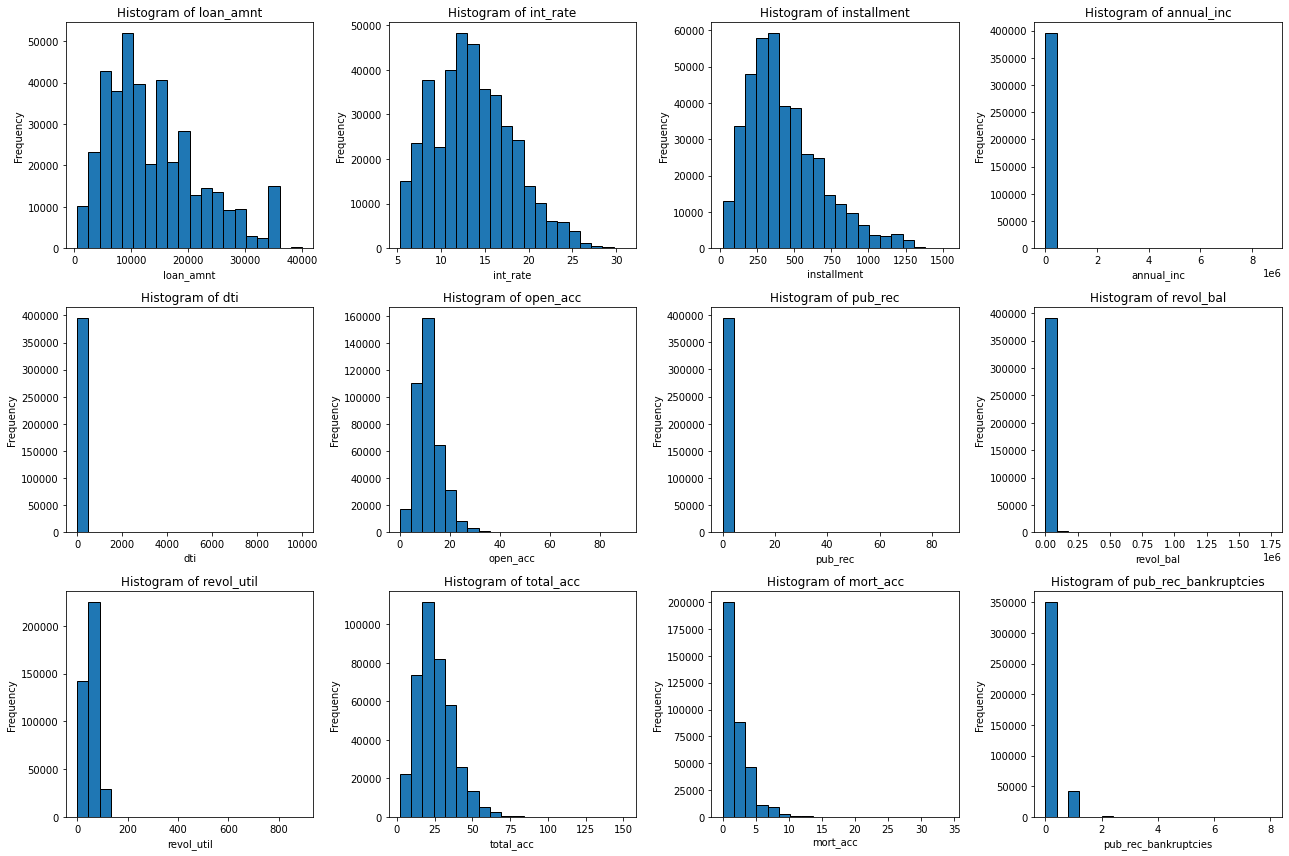

In [101]:
# Create subplots for histograms
fig, axs = plt.subplots(3, 4, figsize=(18, 12))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot histograms for each numerical variable
for i, column in enumerate(numerical_columns):
    axs[i].hist(df[column], bins=20, edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

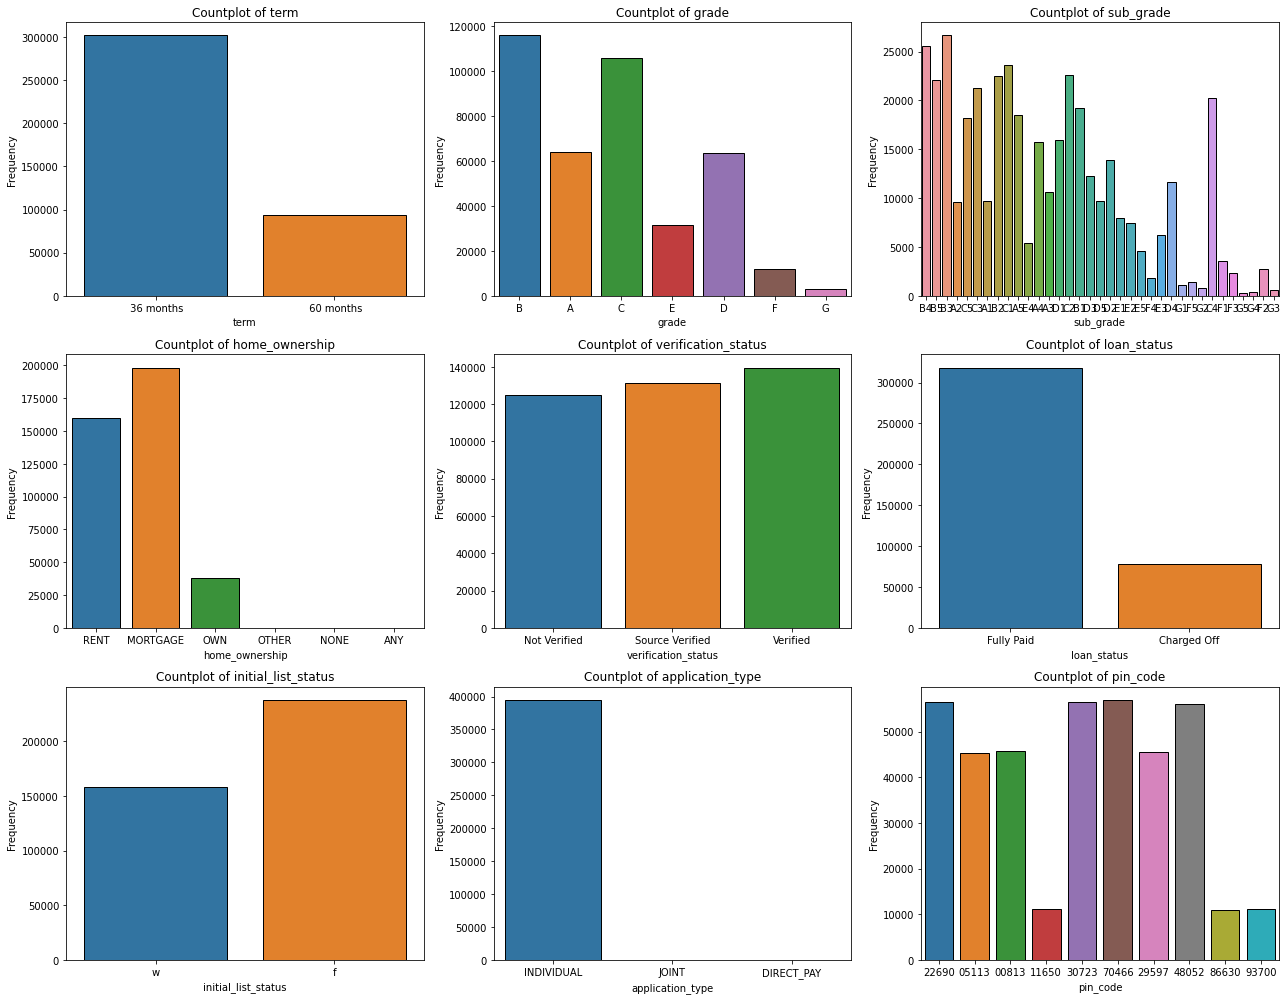

In [102]:
## Categorical Columns EDA

fig, axs = plt.subplots(3, 3, figsize=(18, 14))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot countplot for each categorical variable
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], ax=axs[i], edgecolor='black')
    axs[i].set_title(f'Countplot of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [103]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
title                    1755
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
ecl_year                    0
pin_code                    0
issue_d_y                   0
dtype: int64

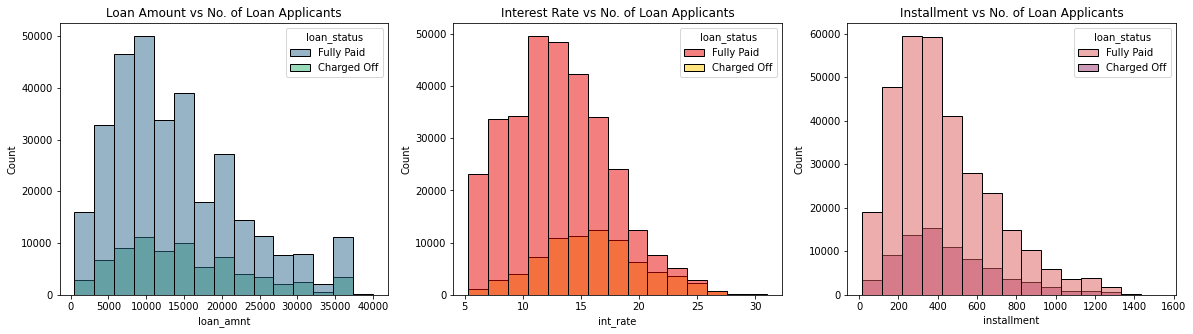

In [104]:
# Check the distribution of data for the numerical columns -> 'loan_amnt', 'int_rate', 'installment'
plt.figure(figsize=(20,5))

x_col = ['loan_amnt', 'int_rate', 'installment']
x_lab = ['Loan Amount', 'Interest Rate', 'Installment']
pal = ['viridis', 'hot', 'flare']

# Create subplots for the columns in consideration
for i in range(len(x_col)):
  plt.subplot(1, len(x_col), i+1)

  # Plot histplot using Seaborn
  sns.histplot(data=df, x=x_col[i], bins=15, hue='loan_status', palette=pal[i])

  # Add labels and title
  plt.title(f'{x_lab[i]} vs No. of Loan Applicants')

People with grades ‘A’ are more likely to fully pay their loan.

<Axes: xlabel='grade', ylabel='count'>

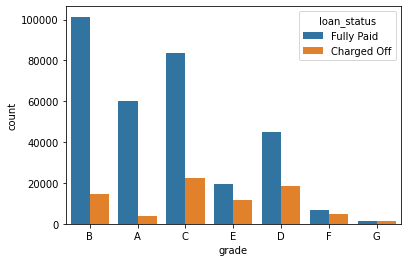

In [105]:
sns.countplot(data=df, x='grade', hue='loan_status')

The distribution suggests that People with grade A are more likely to pay off their lone

<Axes: xlabel='home_ownership', ylabel='count'>

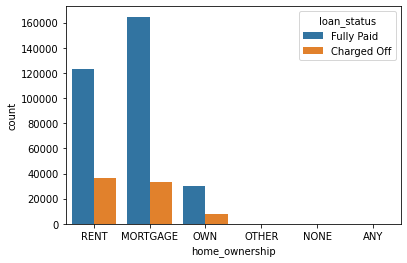

In [106]:
sns.countplot(data=df, x='home_ownership', hue='loan_status')

#### The majority of people have home ownership as mortgage


In [107]:
top_emp = df[df['loan_status']=='Fully Paid']['emp_title'].value_counts().reset_index()[:5]

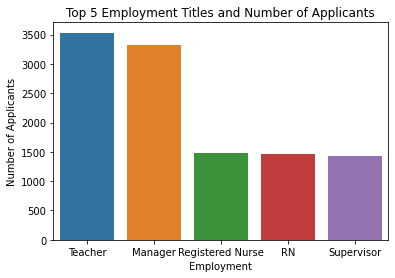

In [108]:
sns.barplot(top_emp, x='index', y='emp_title')
plt.xlabel('Employment')
plt.ylabel('Number of Applicants')
plt.title('Top 5 Employment Titles and Number of Applicants')
plt.show()

Top 2 Employment title that afforded the loan are Teacher and Managers

In [109]:
## removing unnecessary columns
df.drop(['emp_title', 'emp_length', 'mort_acc', 'title'], axis=1, inplace=True)

In [110]:
df.dropna(how='any', axis=0,inplace = True)
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
pub_rec_bankruptcies    0
ecl_year                0
pin_code                0
issue_d_y               0
dtype: int64

#### Target Encoding and Feature Engineering

In [111]:
df1 = df.copy()

In [112]:
df1['pub_rec'] = np.where(df1['pub_rec'] != 0.0,1,0)
df1['mort_acc'] = np.where(df1['pub_rec'] != 0.0,1,0)
df1['pub_rec_bankruptcies'] = np.where(df1['pub_rec'] != 0.0,1,0)

In [113]:
df1['loan_status'] = df1['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,ecl_year,pin_code,issue_d_y,mort_acc
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,1,...,36369.0,41.8,25.0,w,INDIVIDUAL,0,1990,22690,2015,0
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,1,...,20131.0,53.3,27.0,f,INDIVIDUAL,0,2004,05113,2015,0
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,1,...,11987.0,92.2,26.0,f,INDIVIDUAL,0,2007,05113,2015,0
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,1,...,5472.0,21.5,13.0,f,INDIVIDUAL,0,2006,00813,2014,0
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,0,...,24584.0,69.8,43.0,f,INDIVIDUAL,0,1999,11650,2013,0


In [81]:
from category_encoders import TargetEncoder

In [82]:
encoder = TargetEncoder()

In [114]:
df1['term_encoded'] = encoder.fit_transform(df1['term'], df1['loan_status'])
df1['grade_encoded'] = encoder.fit_transform(df1['grade'], df1['loan_status'])
df1['sub_grade_encoded'] = encoder.fit_transform(df1['sub_grade'], df1['loan_status'])
df1['home_ownership_encoded'] = encoder.fit_transform(df1['home_ownership'], df1['loan_status'])
df1['verification_status_encoded'] = encoder.fit_transform(df1['verification_status'], df1['loan_status'])
df1['purpose_encoded'] = encoder.fit_transform(df1['purpose'], df1['loan_status'])
df1['pub_rec_encoded'] = encoder.fit_transform(df1['pub_rec'], df1['loan_status'])
df1['initial_list_status_encoded'] = encoder.fit_transform(df1['initial_list_status'], df1['loan_status'])
df1['application_type_encoded'] = encoder.fit_transform(df1['application_type'], df1['loan_status'])
df1['pub_rec_bankruptcies_encoded'] = encoder.fit_transform(df1['pub_rec_bankruptcies'], df1['loan_status'])
df1['pin_code_encoded'] = encoder.fit_transform(df1['pin_code'], df1['loan_status'])

In [115]:
df1.drop(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'pub_rec', 'initial_list_status', 'application_type', 'pub_rec_bankruptcies', 'pin_code'], axis=1, inplace=True)

### Questionaire

<Axes: >

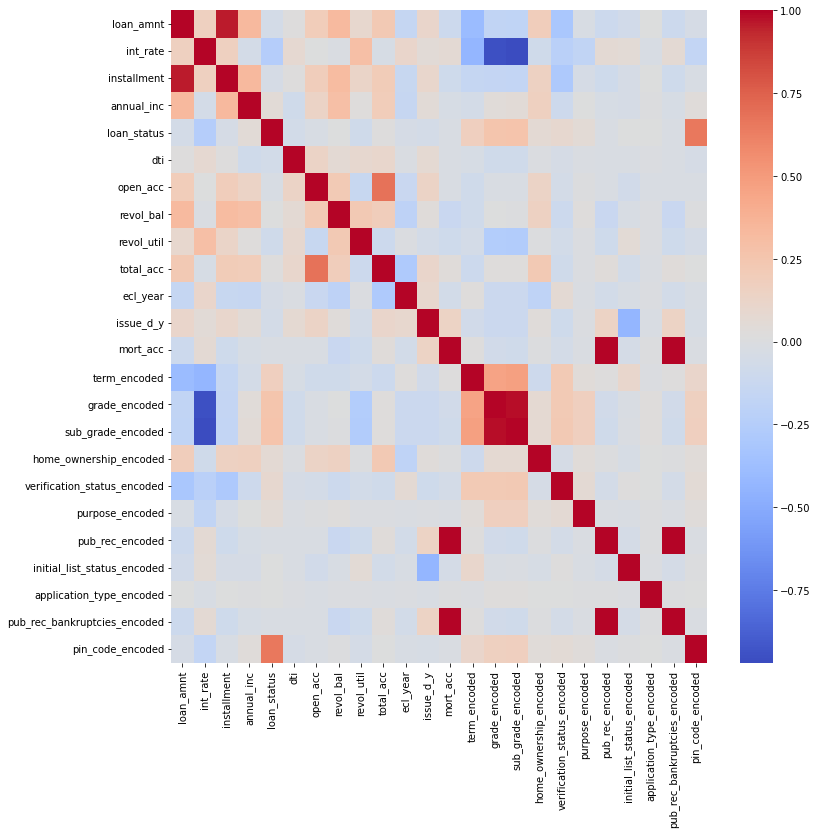

In [116]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), cmap='coolwarm')

Relationship/Correlation between loan amount and installment features

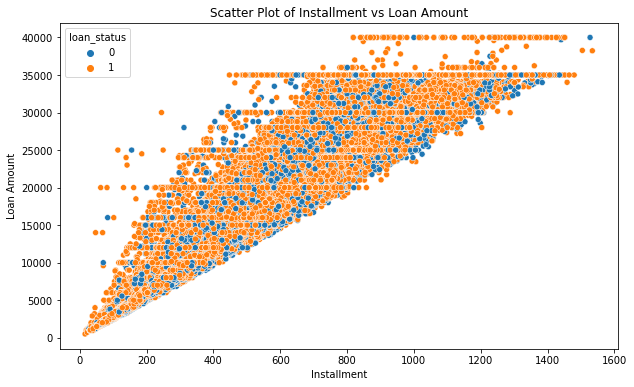

In [117]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='installment', y='loan_amnt', data=df1, hue='loan_status')
plt.title('Scatter Plot of Installment vs Loan Amount')
plt.xlabel('Installment')
plt.ylabel('Loan Amount')
plt.show()

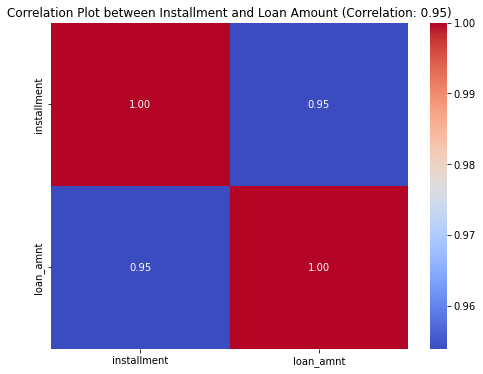

In [118]:
# Calculate the correlation between 'installment' and 'loan_amount'
correlation = df1['installment'].corr(df1['loan_amnt'])

# Create a correlation plot
plt.figure(figsize=(8, 6))
sns.heatmap(df1[['installment', 'loan_amnt']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Plot between Installment and Loan Amount (Correlation: {correlation:.2f})')
plt.show()

#### This is expected as a higher loan amount will lead to a higher installment payment


## Building The Model

In [121]:
X = df1.drop('loan_status', axis=1)
y = df1['loan_status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316175, 23), (79044, 23), (316175,), (79044,))

# Scaling

In [124]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [125]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc

In [144]:
model = LogisticRegression(C=0.01,penalty='l2')
model.fit(X_train, y_train)

LogisticRegression(C=0.01)

Accuracy of the Training dataset : 0.8881885032023404
Accuracy of the Test dataset : 0.888859369465108


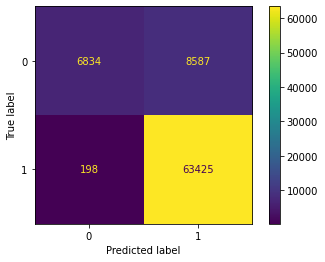

In [158]:
y_pred1 = model.predict(X_test)
proba1 = model.predict_proba(X_test)[:,1]

from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print('Accuracy of the Training dataset :',model.score(X_train,y_train))
print('Accuracy of the Test dataset :',model.score(X_test,y_test))
cm1 = confusion_matrix(y_test, y_pred1, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model.classes_)
disp.plot()
plt.show()

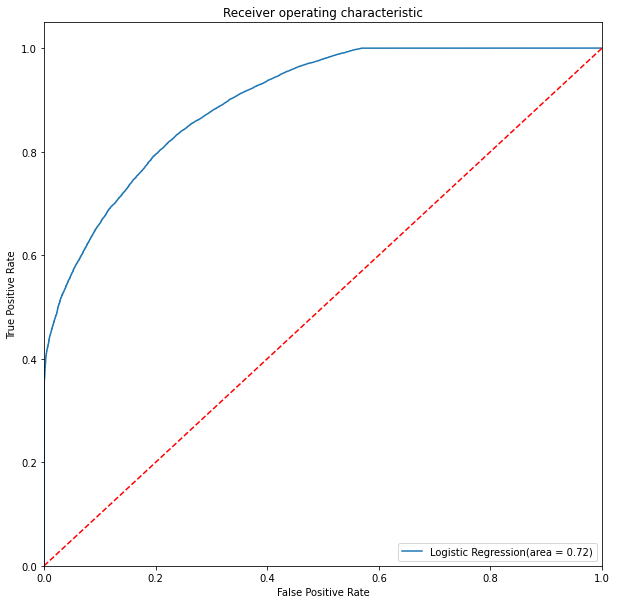

In [147]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
logit_roc_auc = roc_auc_score(y_test, y_pred1)
fpr, tpr, thresholds = roc_curve(y_test, proba1)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [170]:
dic = {}
for coef, col in zip(model.coef_[0], df1.columns):
  dic[col] = abs(coef)
a = sorted(dic.items(), key = lambda kv: (kv[1], kv[0]))
for i in a:
  print(i)

('issue_d_y', 0.0007309805932907222)
('purpose_encoded', 0.0007309805932907222)
('application_type_encoded', 0.0007309805932911719)
('installment', 0.007802455985310828)
('pub_rec_encoded', 0.04372344775506385)
('initial_list_status_encoded', 0.05747709662824527)
('loan_status', 0.05863520204901105)
('open_acc', 0.08306335410737022)
('total_acc', 0.08581698836144723)
('loan_amnt', 0.08843959583263312)
('home_ownership_encoded', 0.16251893116657481)
('annual_inc', 0.2290416623202026)
('int_rate', 0.24935939305709826)
('verification_status_encoded', 0.30534112033491667)
('mort_acc', 0.40261502316596054)
('revol_util', 0.46417101117905907)
('sub_grade_encoded', 0.4903747676159088)
('ecl_year', 0.5819554393220091)
('revol_bal', 0.6053787924786778)
('dti', 0.6554256353649938)
('term_encoded', 0.7455092238996583)
('grade_encoded', 1.2099064637611407)
('pub_rec_bankruptcies_encoded', 8.667730205171601)


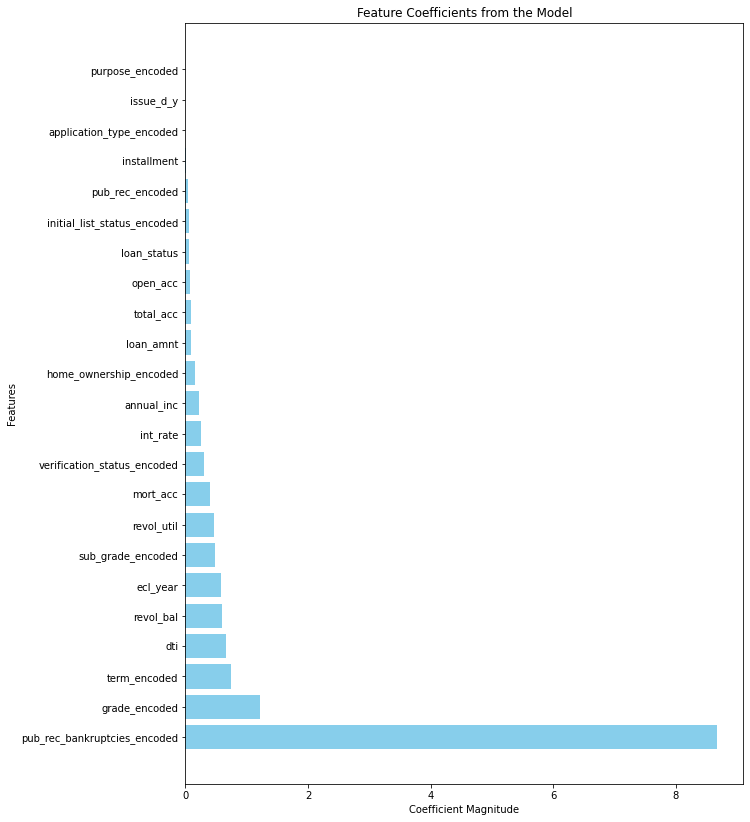

In [169]:
# Sort the coefficients in descending order
sorted_coeffs = sorted(dic.items(), key=lambda x: x[1], reverse=True)

# Extract features and coefficients for plotting
features = [x[0] for x in sorted_coeffs]
coefficients = [x[1] for x in sorted_coeffs]

# Create a bar plot
plt.figure(figsize=(10, 14))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Feature Coefficients from the Model')
plt.show()

Will the results be affected by geographical location? (Yes/No)

No, as the coefficiet is quite low for the pincode variable


In [150]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('cm', cm)
print('f1 score', f1_score(y_test, y_pred))

cm [[ 6834  8587]
 [  198 63425]]
f1 score 0.9352305820768976


In [151]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     15421
           1       0.88      1.00      0.94     63623

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



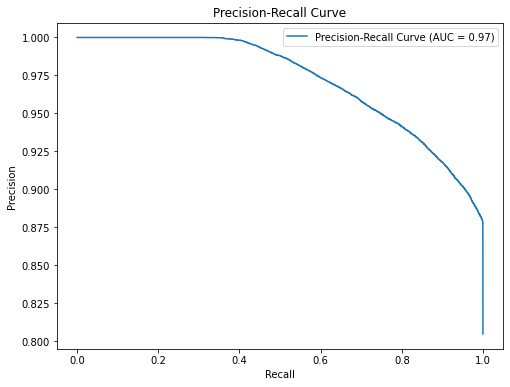

In [154]:
from sklearn.metrics import precision_recall_curve

# Assuming you have the necessary data and model predictions
y_scores = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Calculate the Area Under the Curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

The ideal precision-recall curve would be a straight line in the upper left corner of the graph. This would indicate that the model is able to correctly identify all of the positive items (perfect recall) and none of the negative items (perfect precision).

The curve in the plot is not a straight line, which means that the model is making some mistakes. The fact that the curve leans more towards the top right corner of the graph suggests that the model is prioritizing precision over recall. In other words, the model is trying to avoid making false positives, even if it means missing some of the true positives.

The area under the precision-recall curve (AUC) is a measure of how good the model is at classifying the data. A higher AUC indicates a better model. The AUC for the model in the plot is 0.97, which is a very good score.

Overall, the precision-recall curve in the plot shows that the model is performing well. The model is able to correctly identify most of the positive items, and it is very good at avoiding false positives.

In [157]:
model1 = LogisticRegression(C=0.001,penalty='l2')
model1.fit(X_train, y_train)

LogisticRegression(C=0.001)

Accuracy of the Training dataset : 0.8879512927967107
Accuracy of the Test dataset : 0.8888340671018673


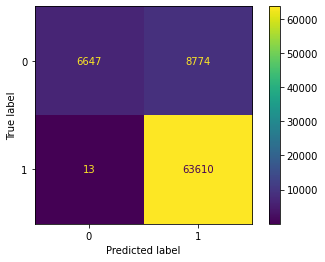

In [165]:
y_pred1 = model1.predict(X_test)
proba1 = model1.predict_proba(X_test)[:,1]

from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print('Accuracy of the Training dataset :',model1.score(X_train,y_train))
print('Accuracy of the Test dataset :',model1.score(X_test,y_test))
cm1 = confusion_matrix(y_test, y_pred1, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model1.classes_)
disp.plot()
plt.show()

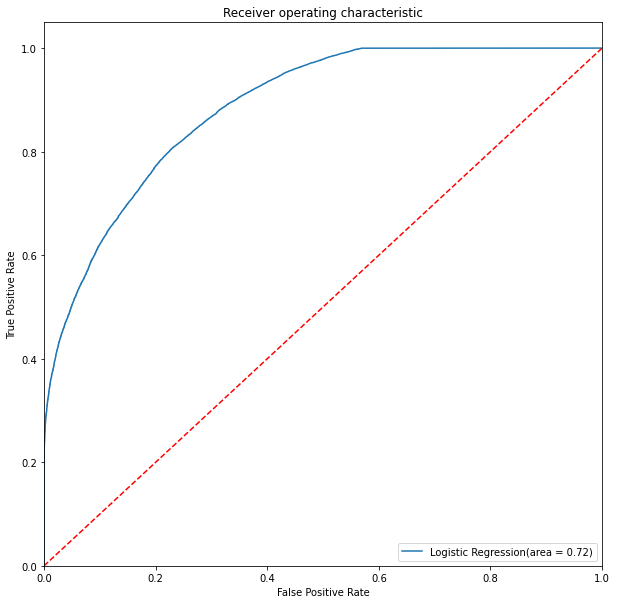

In [166]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
logit_roc_auc = roc_auc_score(y_test, y_pred1)
fpr, tpr, thresholds = roc_curve(y_test, proba1)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [167]:
y_pred = model1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('cm', cm)
print('f1 score', f1_score(y_test, y_pred))

cm [[ 6647  8774]
 [   13 63610]]
f1 score 0.9353930312410391


In [168]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15421
           1       0.88      1.00      0.94     63623

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



The provided classification report shows metrics for a binary classification model with two classes (0 and 1). Here's an interpretation of the metrics and how the gap in precision and recall can affect a bank:

- **Precision**: 
  - For class 0: The precision is 1.00, indicating that when the model predicts class 0, it is correct 100% of the time. However, the recall for class 0 is low at 0.43, meaning that the model only captures 43% of the actual class 0 instances correctly.
  - For class 1: The precision is 0.88, showing that the model correctly predicts class 1 around 88% of the time. The recall for class 1 is high at 1.00, indicating that the model captures all actual class 1 instances.

- **Recall**:
  - Recall, also known as sensitivity, measures the model's ability to identify all relevant instances correctly.
  - The low recall for class 0 suggests that the model misses a significant portion (57%) of actual class 0 instances, which could include important cases like fraudulent transactions or other critical events.

- **F1-score**:
  - The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is a useful metric when you want to consider both precision and recall simultaneously.

- **Impact on the Bank**:
  - In the context of a bank, the gap between precision and recall can have significant implications. A high precision but low recall (as seen for class 0) means that while the model is accurate in flagging certain cases, it misses a substantial number of actual cases. This could lead to missed opportunities to detect fraudulent transactions or other important events, potentially resulting in financial losses or security risks for the bank.
  - On the other hand, a high recall but lower precision (as seen for class 1) might result in more false alarms, where legitimate transactions are flagged incorrectly. While this can be managed, it may lead to customer dissatisfaction or unnecessary investigations, impacting operational efficiency.

Therefore, in the banking context, achieving a balance between precision and recall is crucial to ensure that the model effectively identifies both fraudulent activities (class 0) and legitimate transactions (class 1) without missing critical instances or generating excessive false alarms.


Tradeoff Questions:
#### How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it. (10 Points)
#### Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. (10 Points)



### Ensuring Model Accuracy:
To address these challenges and ensure the model effectively detects real defaulters while minimizing false positives, consider the following strategies:
1. **Balancing Precision and Recall**:
   - Aim for a balance between precision and recall to identify real defaulters while minimizing false positives. This balance is crucial in making accurate lending decisions.

2. **Optimizing Model Threshold**:
   - Adjust the model's threshold to optimize the trade-off between precision and recall based on the bank's risk tolerance and business objectives.

3. **Feature Importance**:
   - Identify and prioritize key features that contribute to predicting loan defaults accurately, such as Debt-to-Income Ratio, Credit History, and other influential factors.

4. **Model Validation**:
   - Validate the model rigorously to ensure its robustness and generalizability, considering the implications of false positives and false negatives on the bank's operations.

5. **Continuous Monitoring**:
   - Implement continuous monitoring of the model's performance and recalibration to adapt to changing market conditions and evolving customer behaviors.

By implementing these strategies, the bank can enhance its risk management practices, make informed lending decisions, and minimize the impact of false positives on financing opportunities, ultimately safeguarding its growth and financial stability.




### Importance of Loan Disbursement:
- **Economic Function**:
  - Loan disbursement is essential for economic growth as it fuels investments, stimulates consumption, and supports business expansion, which are crucial for overall economic development.

- **Risk Management**:
  - While NPAs pose a risk, prudent risk management practices, such as robust credit assessments, monitoring, and predictive analytics, can help mitigate the risk of defaults and NPAs.

- **Customer Relationships**:
  - Denying loans to all applicants can harm customer relationships and trust in the institution. It's crucial to balance risk management with providing financial services to creditworthy individuals.

### Mitigating NPA Risks:
- **Advanced Analytics**:
  - Leveraging predictive analytics and advanced models can help identify potential defaulters accurately, enabling informed lending decisions and reducing the risk of NPAs.

- **Data-Driven Decisions**:
  - Data science techniques offer insights into borrower behavior and risk assessment, enhancing the accuracy of loan default prediction and reducing the likelihood of NPAs.

- **Continuous Monitoring**:
  - Proactive monitoring of loan portfolios, early warning signs, and regular risk assessments can help financial institutions detect and address potential NPAs promptly.

### Balanced Approach:
- **Risk vs. Opportunity**:
  - While managing NPAs is crucial, completely avoiding loan disbursement can hinder opportunities for growth and financial inclusion. It's essential to balance risk aversion with the need to support creditworthy borrowers.

- **Prudent Lending Practices**:
  - Implementing stringent credit evaluation processes, monitoring mechanisms, and risk mitigation strategies can help financial institutions navigate the challenges posed by NPAs while continuing to support responsible lending.

In conclusion, while NPAs are a significant concern in the financial industry, adopting an overly cautious approach of not disbursing loans to anyone is not a viable solution. Instead, financial institutions should focus on implementing robust risk management practices, leveraging data analytics, and maintaining a balanced approach to lending that considers both risk mitigation and the importance of providing financial services to creditworthy individuals.

